# Modelling

In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# load our clean df created from Cleaning-and-EDA
df_clean = pd.read_csv('Data/clean_df.csv')

In [3]:
#establish x and y variables
x = df_clean[['Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F','independent_travel','dependent_travel','number_of_modes','senior','D26']]
y = df_clean['uses_pt']

In [4]:
#Create Dummy columns for rural vs urban variable
x = pd.get_dummies(x,columns=['D26'],drop_first=True)
x

,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24J,Q28_3A,Q28_3B,Q28_3C,...,dependent_travel,number_of_modes,senior,D26_Rural area,D26_SKIPPED ON WEB,D26_Small town,D26_Suburban and mostly residential,"D26_Suburban with a mix of offices, apartments and shops",D26_Urban and mostly residential,"D26_Urban near mix of offices, apartments and shops"
0,1,1,0,0,0,0,0,1.0,1.0,1.0,...,0,2,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,5.0,5.0,5.0,...,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,2.0,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,4.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,3.0,3.0,2.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0,0,0,0,0,1.0,4.0,1.0,...,0,1,0,0,1,0,0,0,0,0
1943,0,0,0,0,0,0,0,1.0,1.0,5.0,...,1,1,0,0,0,0,0,0,0,1
1944,1,1,1,0,0,0,0,4.0,4.0,4.0,...,0,3,1,0,0,0,0,0,1,0
1945,0,1,0,0,0,0,0,1.0,4.0,4.0,...,0,1,1,1,0,0,0,0,0,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

<AxesSubplot:>

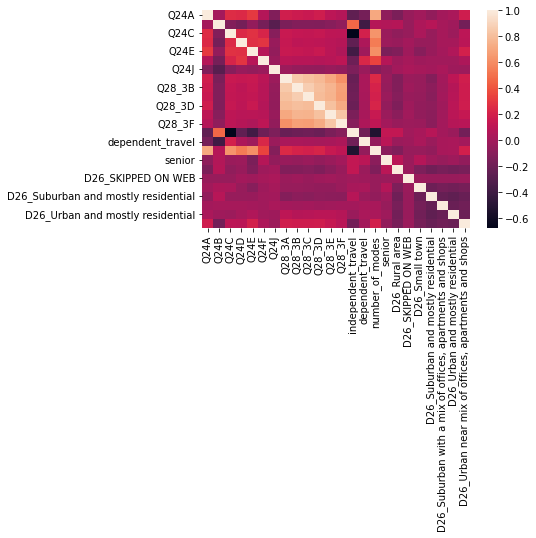

In [6]:
sns.heatmap(x.corr())

In [7]:
log_reg = sm.Logit(y_train,x_train)

In [8]:
log_reg.fit()

C:\Users\potte\tools\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\potte\tools\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

# Changing Gears to ANOVA table

In [10]:
df_anova_seniors = df_clean[['senior','uses_pt','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_seniors

,senior,uses_pt,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
0,1,0,1.0,1.0,1.0,1.0,5.0,5.0
1,1,0,5.0,5.0,5.0,4.0,4.0,5.0
2,0,0,2.0,3.0,3.0,3.0,3.0,2.0
3,0,0,4.0,3.0,4.0,2.0,3.0,2.0
4,0,0,3.0,3.0,2.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
1942,0,0,1.0,4.0,1.0,1.0,4.0,4.0
1943,0,1,1.0,1.0,5.0,5.0,5.0,5.0
1944,1,0,4.0,4.0,4.0,4.0,4.0,4.0
1945,1,0,1.0,4.0,4.0,2.0,2.0,3.0


In [ ]:
#https://www.reneshbedre.com/blog/anova.html
# Ordinary Least Squares (OLS) model
#in progress
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table